In [1]:
%run header.ipynb

The Karplus-Strong algorithm is not exactly a physical model, but it can be considered a preliminary stage to waveguides. The algorithm is based on a ringbuffer, filled with (white) noise, which is then manipulated. With very simple means, Karplus-Strong can synthesize sounds with the characteristics of plucked strings. Although not entirely realistic, the result has a intriguing individual character.

-----

# The Ringbuffer

Ringbuffers are the central element of the Karplus-Strong algorithm. As the name suggests, they are FIFO (first in - first out) buffers, with beginning and end connected.
A ringbuffer with `N` samples can be visualized as follows:

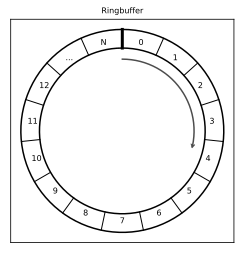

In [2]:
theta = np.linspace(0, -2*np.pi, 100) + np.pi/2

fig, ax = plt.subplots(1)


r1 = np.sqrt(1.0)
x1 = r1*np.cos(theta)
x2 = r1*np.sin(theta)
ax.plot(x1, x2, color=[0,0,0])


r2 = np.sqrt(1.5)
x1 = r2*np.cos(theta)
x2 = r2*np.sin(theta)
ax.plot(x1, x2, color=[0,0,0])

r3 = np.sqrt(0.75)
x1 = r3*np.cos(theta[0:30])
x2 = r3*np.sin(theta[0:30])
ax.plot(x1[0:-1], x2[0:-1], color=[0.3,0.3,0.3])

ax.annotate("", xy=(x1[-1], x2[-1]),xytext=(x1[-2], x2[-2]), arrowprops=dict(arrowstyle= 'fancy',
                             color=[0.3,0.3,0.3],
                             lw=0.5, ls='--'))    


sts = np.linspace(0,2*np.pi,16)

 
cnt = 0

for i in sts:
    
    x1 = r1*np.sin(i)
    x2 = r2*np.sin(i)


    y1 = r1*np.cos(i)
    y2 = r2*np.cos(i)

    ax.plot(np.linspace(x1,x2,100),np.linspace(y1,y2,100), color=[0,0,0],  linewidth=1.0)

    
    if cnt>0:
        
        x = ((r1+r2)/2) * (np.sin(sts[cnt])+np.sin(sts[cnt-1]))/2
        y = ((r1+r2)/2) * (np.cos(sts[cnt])+np.cos(sts[cnt-1]))/2

        if cnt<=13:
            ax.text(x,y, str(cnt-1), fontsize=8, va='center', ha='center')

        elif cnt<=14:
            ax.text(x,y, "...", fontsize=8, va='center', ha='center')    
        else:
            ax.text(x,y, "N", fontsize=8, va='center', ha='center')

    
    cnt+=1    
    
    
x1 = r1*np.sin(sts[0])
x2 = r2*np.sin(sts[0])
y1 = r1*np.cos(sts[0])
y2 = r2*np.cos(sts[0])
ax.plot(np.linspace(x1,x2,100),np.linspace(y1,y2,100), color=[0,0,0],  linewidth=3.0)    
    
ax.set_aspect(1)
  
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.title('Ringbuffer', fontsize=8)


plt.show()



-----

# White Tone from White Noise

If a ringbuffer is filled with a sequence of white noise, it can be used for creating a *white tone* - a harmonic sound with a strong overtone structure. 
Without resampling, the ring buffer can be shifted by one sample each $1/f_s$ seconds. 
The resulting pitch of the sound is then determined by the buffer size:

$$f_0 = \frac{f_s}{N}$$

For a sampling rate of $48000$ Hz, a ringbuffer with a length of $N=200$ samples, results in the following pitch:





In [3]:
fs          = 48000
L           = 200

f0          = fs/L;

display(Markdown(
rf"""

$$f_0 = \frac{{ {fs} }}{{ {L} }} = {f0}\ \mathrm{{Hz}}$$

"""
))



$$f_0 = \frac{ 48000 }{ 200 } = 240.0\ \mathrm{Hz}$$



The sound of this harmonic signal is similar to a buzzer:

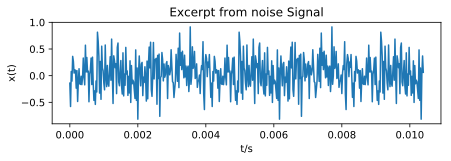

In [4]:



# a function for appending the array again and again
# arbitrary 300 times ...
def appender(x):
    y = np.array([])

    for i in range(300):
        y = np.append(y,x*0.33)

    return y
    
    
x = np.random.standard_normal(L)
y = appender(x)

t = np.linspace(0,len(y)/fs,len(y))
f = np.linspace(0,fs,len(y))

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
line, = ax.plot(t[0:500],y[0:500])

ax.set_title('Excerpt from noise Signal')
ax.set_xlabel("$t/s$");
ax.set_ylabel("$x(t)$");

ipd.display(ipd.Audio(y, rate=fs)) 

-----

## Spectrum

The spectrum of the *white tone* includes all harmonics up to the Nyquist frequency with a random amplitude. The overtone structure is individual for every white noise sequence, as is the timbre. These are three versions, started with an individual noise sequence of $N=400$ samples.

### Version 1

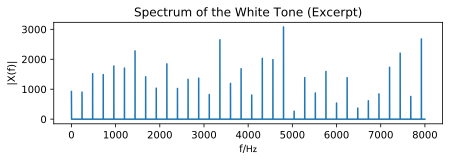

In [5]:
L       = 400
t       = np.linspace(0,len(y)/fs,len(y))
f       = np.linspace(0,fs,len(y))

x = np.random.standard_normal(L)
y = appender(x)

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
Y = abs(np.fft.fft(y))

Y = Y[0:10000]
f = f[0:10000]

line2, = ax.plot(f,Y)

ax.set_title('Spectrum of the White Tone (Excerpt)')
ax.set_xlabel("$f/\mathrm{Hz}$");
ax.set_ylabel("$|X(f)|$");

ipd.display(ipd.Audio(y, rate=fs)) 

### Version 2

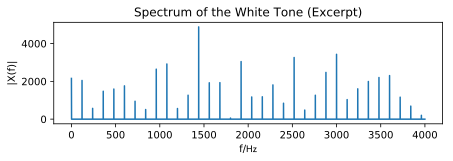

In [6]:
L       = 400
t       = np.linspace(0,len(y)/fs,len(y))
f       = np.linspace(0,fs,len(y))

x = np.random.standard_normal(L)
y = appender(x)

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
Y = abs(np.fft.fft(y))

Y = Y[0:10000]
f = f[0:10000]

line2, = ax.plot(f,Y)

ax.set_title('Spectrum of the White Tone (Excerpt)')
ax.set_xlabel("$f/\mathrm{Hz}$");
ax.set_ylabel("$|X(f)|$");

ipd.display(ipd.Audio(y, rate=fs)) 

### Version 3

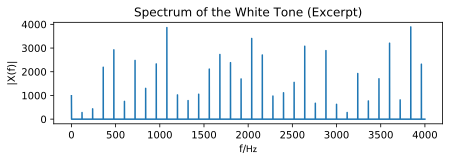

In [7]:
L       = 400
t       = np.linspace(0,len(y)/fs,len(y))
f       = np.linspace(0,fs,len(y))

x = np.random.standard_normal(L)
y = appender(x)

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
Y = abs(np.fft.fft(y))

Y = Y[0:10000]
f = f[0:10000]

line2, = ax.plot(f,Y)

ax.set_title('Spectrum of the White Tone (Excerpt)')
ax.set_xlabel("$f/\mathrm{Hz}$");
ax.set_ylabel("$|X(f)|$");

ipd.display(ipd.Audio(y, rate=fs)) 

-----

# Karplus-Strong

Karplus-Strong makes use of the random buffer and combines it with a moving average filter.
In the most basic form, two samples are read from the buffer $b$, starting from index $i$ (the playhead), and the average of both samples is written to the buffer. An additional gain factor - set to $0.95$ in this example, results in a faster decay:

$$ b[i] = 0.5  (b[i] + b[i+1])$$

$b[i]$ is directly sent to the output $y$ in each step:

$$y[i] = b[i]$$
   
 

$i$ is increased, until it reaches $N$ and continues from the beginning. The following image shows this for $i=3$:


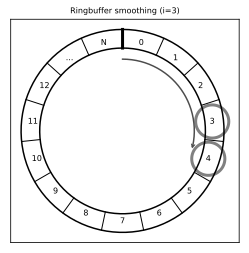

In [8]:
theta = np.linspace(0, -2*np.pi, 100) + np.pi/2

fig, ax = plt.subplots(1)


r1 = np.sqrt(1.0)
x1 = r1*np.cos(theta)
x2 = r1*np.sin(theta)
ax.plot(x1, x2, color=[0,0,0])


r2 = np.sqrt(1.5)
x1 = r2*np.cos(theta)
x2 = r2*np.sin(theta)
ax.plot(x1, x2, color=[0,0,0])

r3 = np.sqrt(0.75)
x1 = r3*np.cos(theta[0:30])
x2 = r3*np.sin(theta[0:30])
ax.plot(x1[0:-1], x2[0:-1], color=[0.3,0.3,0.3])

ax.annotate("", xy=(x1[-1], x2[-1]),xytext=(x1[-2], x2[-2]), arrowprops=dict(arrowstyle= 'fancy',
                             color=[0.3,0.3,0.3],
                             lw=0.5, ls='--'))    


sts = np.linspace(0,2*np.pi,16)

 
cnt = 0

for i in sts:
    
    x1 = r1*np.sin(i)
    x2 = r2*np.sin(i)


    y1 = r1*np.cos(i)
    y2 = r2*np.cos(i)

    ax.plot(np.linspace(x1,x2,100),np.linspace(y1,y2,100), color=[0,0,0],  linewidth=1.0)

    
    if cnt>0:
        
        x = ((r1+r2)/2) * (np.sin(sts[cnt])+np.sin(sts[cnt-1]))/2
        y = ((r1+r2)/2) * (np.cos(sts[cnt])+np.cos(sts[cnt-1]))/2

        
        if cnt==4:
            circle1 = plt.Circle((x, y), 0.2, color=[0.5,0.5,0.5], fill=False, lw=3)
            plt.gca().add_patch(circle1)
        if cnt==5:
            circle1 = plt.Circle((x, y), 0.2, color=[0.5,0.5,0.5], fill=False, lw=3)
            plt.gca().add_patch(circle1)
        
        if cnt<=13:
            ax.text(x,y, str(cnt-1), fontsize=8, va='center', ha='center')

        elif cnt<=14:
            ax.text(x,y, "...", fontsize=8, va='center', ha='center')    
        else:
            ax.text(x,y, "N", fontsize=8, va='center', ha='center')

    
    cnt+=1    
    
    
x1 = r1*np.sin(sts[0])
x2 = r2*np.sin(sts[0])
y1 = r1*np.cos(sts[0])
y2 = r2*np.cos(sts[0])
ax.plot(np.linspace(x1,x2,100),np.linspace(y1,y2,100), color=[0,0,0],  linewidth=3.0)    
    
ax.set_aspect(1)
  
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.title('Ringbuffer smoothing (i=3)', fontsize=8)


plt.show()


The result of this circular smoothing is a gradual decrease in high frequencies. The sound begins with a metallic transient:

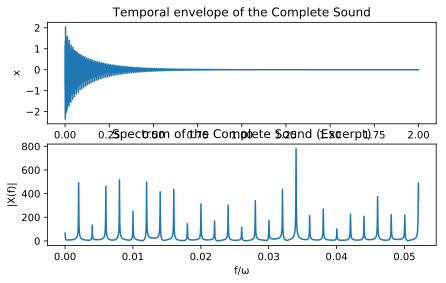

In [9]:
# this implementation serves for a better  
# understanding and is not efficient
#
# - wait for process to be finished in 
#   interactive use




fs          = 48000
L           = 500

# the feedback gain
gain   = 0.95

# the number of samples used for smoothing
smooth = 2

 
def karplus_strong(L,gain,smooth):
    
    x = np.random.standard_normal(L)
    y = np.array([])

    
    for i in range(2*fs):
        k   = i%L                       
        tmp = 0;
                
        for j in range(smooth):             
            tmp += x[(k+j) %L]
            
        tmp = tmp/smooth
            
        x[k] = gain*tmp
        y = np.append(y,tmp)

    return y
    
    
# the feedback gain
gain   = 0.95

# the number of samples used for smoothing
smooth = 2    
    
    
y = karplus_strong(L,gain,smooth)

t = np.linspace(0,len(y)/fs,len(y))
f = np.linspace(0,1,len(y))

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
line, = ax.plot(t,y)
ax.set_title('Temporal envelope of the Complete Sound')
ax.set_xlabel("$t / s $");
ax.set_ylabel("$x$");

ax2    = fig.add_subplot(2, 1, 2)
Y = abs(np.fft.fft(y))
ax2.set_title('Spectrum of the Complete Sound (Excerpt)')
ax2.set_xlabel("$f/ \omega$");
ax2.set_ylabel("$|X(f)|$");

Y = Y[0:5000]
f = f[0:5000]

line2, = ax2.plot(f,Y)


ipd.display(ipd.Audio(y, rate=fs))
    


 

-----

## Increasing the Filter Size


A faster decay of high frequencies can be achieved by larger moving average filters. This example uses a moving average of $10$ samples and a gain of $0.95$.

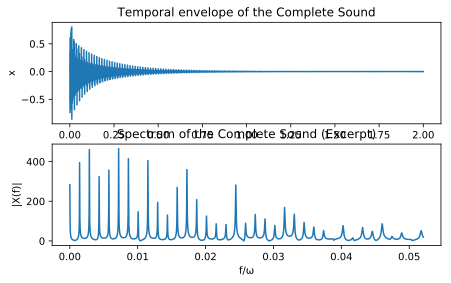

In [10]:
L = 700

# the feedback gain
gain   = 0.95

# the number of samples used for smoothing
smooth = 10    
    
    
y = karplus_strong(L,gain,smooth)

t = np.linspace(0,len(y)/fs,len(y))
f = np.linspace(0,1,len(y))

fig   = plt.figure()
ax    = fig.add_subplot(2, 1, 1)
line, = ax.plot(t,y)
ax.set_title('Temporal envelope of the Complete Sound')
ax.set_xlabel("$t / s $");
ax.set_ylabel("$x$");


ax2   = fig.add_subplot(2, 1, 2)
Y     = abs(np.fft.fft(y))
ax2.set_title('Spectrum of the Complete Sound (Excerpt)')
ax2.set_xlabel("$f/ \omega$");
ax2.set_ylabel("$|X(f)|$");

Y = Y[0:5000]
f = f[0:5000]

line2, = ax2.plot(f,Y)

 
ipd.display(ipd.Audio(y, rate=fs))
    